Importo las librerias a trabajar

In [98]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
from category_encoders import one_hot

Lectura de dataset

In [99]:
data_set=pd.read_excel("Libro2.xlsx")
data_set.head(5)

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


Cambio los nombres de las variables para un mejor manejo posterior

In [100]:
data_set.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data_set.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


Tambien traduzco los registros para un mejor entendimiento

In [101]:
data_set.Clase=data_set.Clase.replace({'p':'venenosa','e':'comestible'})
data_set.TipoCabeza=data_set.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data_set.SuperficieCabeza=data_set.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data_set.ColorCabeza=data_set.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set.Moretones=data_set.Moretones.replace({'t':'si','f':'no'})
data_set.Fragancia=data_set.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data_set.AccesorioBranquial=data_set.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data_set.EspacioBranquias=data_set.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data_set.TamannoBranquia=data_set.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data_set.ColorBranquia=data_set.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set.FormaTallo=data_set.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data_set.Volva=data_set.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data_set.SuperficieSuperioralAnillo=data_set.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set.SuperficieInferioralAnillo=data_set.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set.ColorTalloSuperioralAnillo=data_set.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set.ColorTalloInferioralAnillo=data_set.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set.TipoVelo=data_set.TipoVelo.replace({'p':'parcial','u':'universal'})
data_set.ColorVelo=data_set.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data_set.CantidadAnillos=data_set.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data_set.TipoAnillo=data_set.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data_set.ColorImpresionEsporas=data_set.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data_set.Poblacion=data_set.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data_set.Habitat=data_set.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data_set.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,venenosa,convexa,lisa,marron,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
1,2,comestible,convexa,lisa,amarillo,si,almendra,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,pastos
2,3,comestible,campana,lisa,blanco,si,anis,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,prados
3,4,venenosa,convexa,escamosa,blanco,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
4,5,comestible,convexa,lisa,gris,no,inoloro,libre,abarrotado,ancho,...,liso,blanco,blanco,parcial,blanco,uno,evanecente,marron,abundante,pastos


In [102]:
data_set.shape

(8124, 24)

<h1>Inicio de Exploracion del dataset elegido<h1>

In [103]:
data_set.info

<bound method DataFrame.info of         ID       Clase    TipoCabeza SuperficieCabeza ColorCabeza Moretones  \
0        1    venenosa       convexa             lisa      marron        si   
1        2  comestible       convexa             lisa    amarillo        si   
2        3  comestible       campana             lisa      blanco        si   
3        4    venenosa       convexa         escamosa      blanco        si   
4        5  comestible       convexa             lisa        gris        no   
5        6  comestible       convexa         escamosa    amarillo        si   
6        7  comestible       campana             lisa      blanco        si   
7        8  comestible       campana         escamosa      blanco        si   
8        9    venenosa       convexa         escamosa      blanco        si   
9       10  comestible       campana             lisa    amarillo        si   
10      11  comestible       convexa         escamosa    amarillo        si   
11      12  comestib

<h3>Analisis de valores nulos <h3>

Porcentaje de valores nulos por culumna

In [104]:
pd.set_option('display.max_rows', None)

serie = (data_set.isnull().sum()/data_set.shape[0])*100 
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

Grafico de valores nulos por columna

<AxesSubplot: >

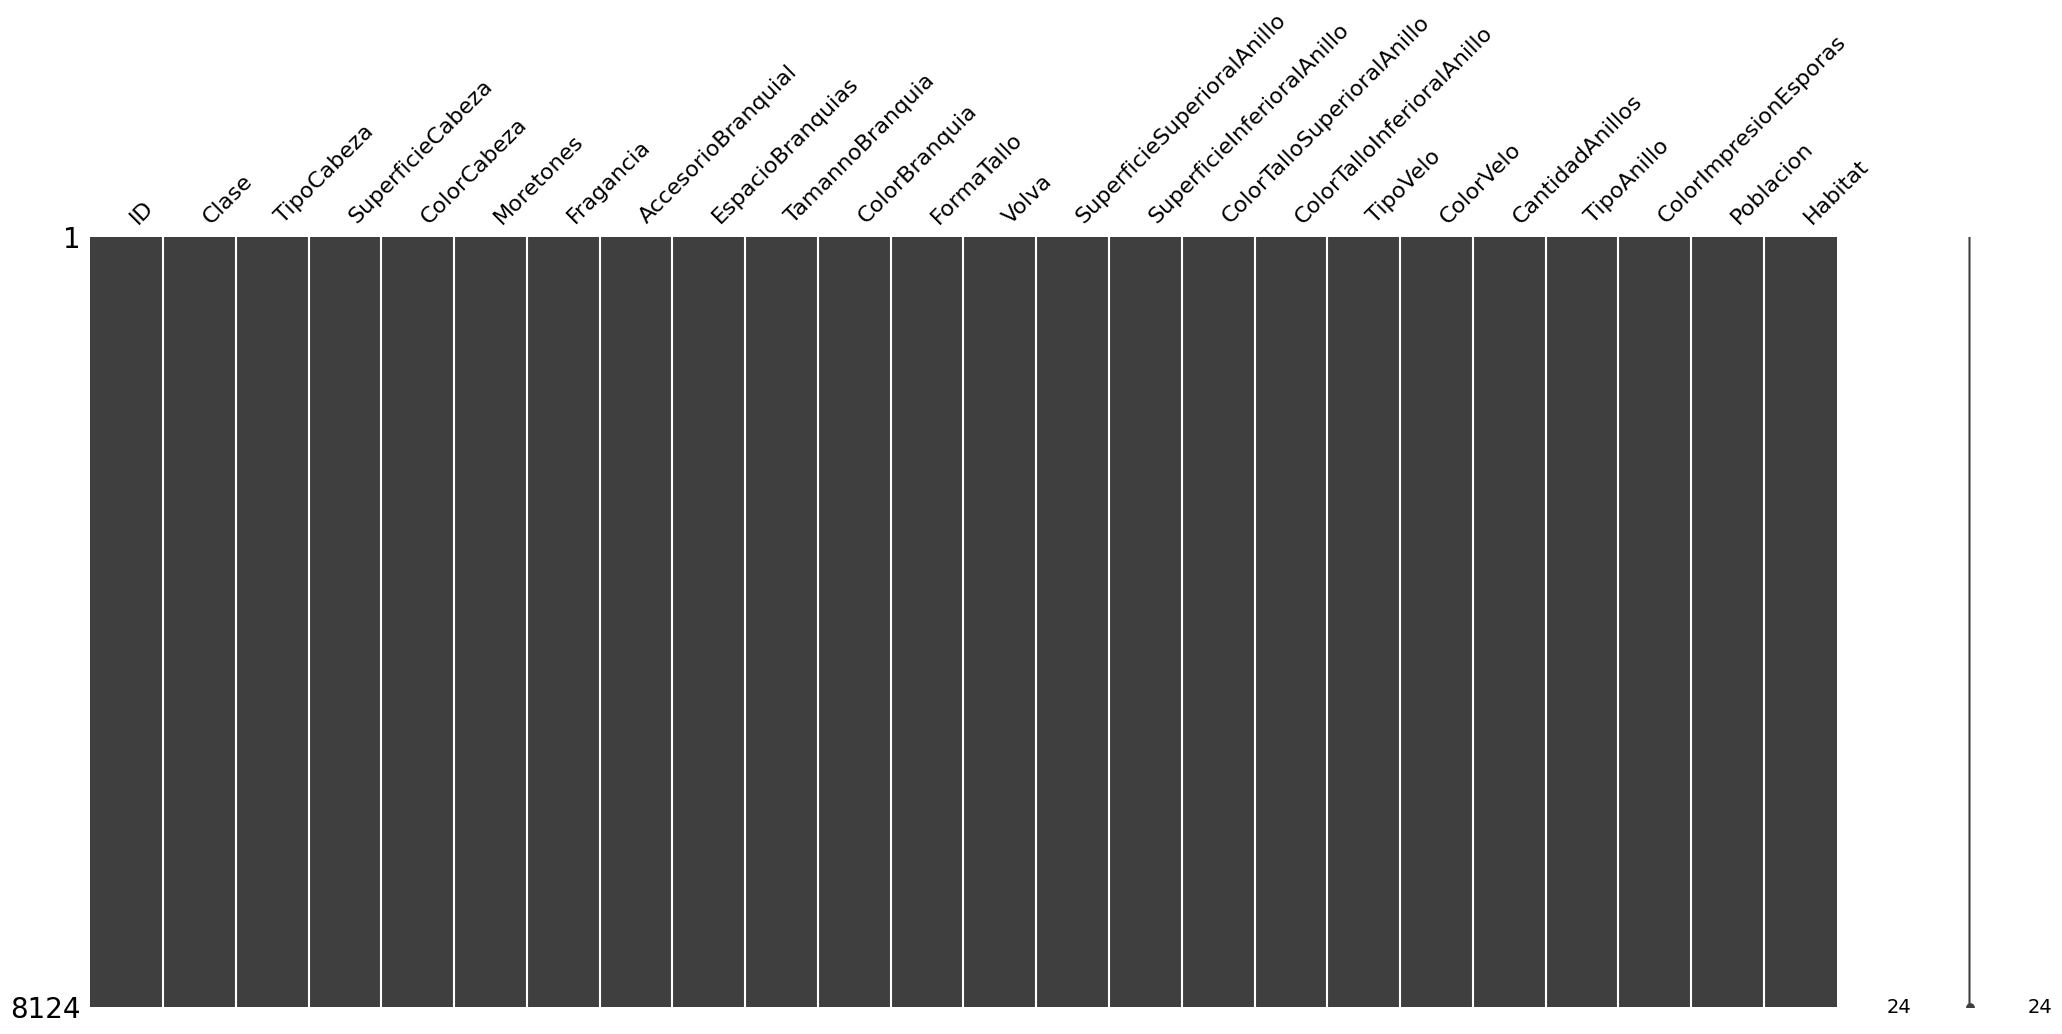

In [105]:
msno.matrix(data_set)

Observo las variables una por una en cuanto a sus valores nulos

In [106]:
a="-"

for i in range(1,25,1):
    b="-"
    a=a+b

a


'-------------------------'

In [107]:
print("Moretones")
print(a)
print('Conteo de valores por variable:\n',data_set.Clase.value_counts())
print('\n','Total de Valores nulos:',data_set.Clase.isnull().sum())

Moretones
-------------------------
Conteo de valores por variable:
 comestible    4208
venenosa      3916
Name: Clase, dtype: int64

 Total de Valores nulos: 0


In [108]:
print('Conteo de valores por variable:\n',data_set.TipoCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoCabeza.isnull().sum())

Conteo de valores por variable:
 convexa         3656
plana           3152
protuberante     828
campana          452
hundida           32
conica             4
Name: TipoCabeza, dtype: int64

 Total de Valores nulos: 0


In [109]:
print('Conteo de valores por variable:\n',data_set.SuperficieCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieCabeza.isnull().sum())

Conteo de valores por variable:
 escamosa    3244
lisa        2556
fibrosa     2320
ranuras        4
Name: SuperficieCabeza, dtype: int64

 Total de Valores nulos: 0


In [110]:
print('Conteo de valores por variable:\n',data_set.ColorCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorCabeza.isnull().sum())

Conteo de valores por variable:
 marron      2284
gris        1840
rojo        1500
amarillo    1072
blanco      1040
beige        168
rosa         144
canela        44
violeta       16
verde         16
Name: ColorCabeza, dtype: int64

 Total de Valores nulos: 0


In [111]:
print('Conteo de valores por variable:\n',data_set.Moretones.value_counts())
print('\n','Total de Valores nulos:',data_set.Moretones.isnull().sum())

Conteo de valores por variable:
 no    4748
si    3376
Name: Moretones, dtype: int64

 Total de Valores nulos: 0


In [112]:
print('Conteo de valores por variable:\n',data_set.Fragancia.value_counts())
print('\n','Total de Valores nulos:',data_set.Fragancia.isnull().sum())

Conteo de valores por variable:
 inoloro      3528
fetido       2160
pescado       576
especiado     576
almendra      400
anis          400
acre          256
creosota      192
mohoso         36
Name: Fragancia, dtype: int64

 Total de Valores nulos: 0


In [113]:
print('Conteo de valores por variable:\n',data_set.AccesorioBranquial.value_counts())
print('\n','Total de Valores nulos:',data_set.AccesorioBranquial.isnull().sum())

Conteo de valores por variable:
 libre      7914
adjunto     210
Name: AccesorioBranquial, dtype: int64

 Total de Valores nulos: 0


In [114]:
print('Conteo de valores por variable:\n',data_set.EspacioBranquias.value_counts())
print('\n','Total de Valores nulos:',data_set.EspacioBranquias.isnull().sum())

Conteo de valores por variable:
 cerca         6812
abarrotado    1312
Name: EspacioBranquias, dtype: int64

 Total de Valores nulos: 0


In [115]:
print('Conteo de valores por variable:\n',data_set.TamannoBranquia.value_counts())
print('\n','Total de Valores nulos:',data_set.TamannoBranquia.isnull().sum())

Conteo de valores por variable:
 ancho       5612
estrecho    2512
Name: TamannoBranquia, dtype: int64

 Total de Valores nulos: 0


In [116]:
print('Conteo de valores por variable:\n',data_set.ColorBranquia.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorBranquia.isnull().sum())

Conteo de valores por variable:
 beige        1728
rosa         1492
blanco       1202
marron       1048
gris          752
chocolate     732
violeta       492
negro         408
rojo           96
amarillo       86
naranja        64
verde          24
Name: ColorBranquia, dtype: int64

 Total de Valores nulos: 0


In [117]:
print('Conteo de valores por variable:\n',data_set.FormaTallo.value_counts())
print('\n','Total de Valores nulos:',data_set.FormaTallo.isnull().sum())

Conteo de valores por variable:
 disminuyendo    4608
agrandando      3516
Name: FormaTallo, dtype: int64

 Total de Valores nulos: 0


In [118]:
print('Conteo de valores por variable:\n',data_set.Volva.value_counts())
print('\n','Total de Valores nulos:',data_set.Volva.isnull().sum())

Conteo de valores por variable:
 bulboso      3776
faltante     2480
igual        1120
club          556
enraizado     192
Name: Volva, dtype: int64

 Total de Valores nulos: 0


En la variable Vovla observo que tengo 2480 registros con el valor '?' que es valor faltante. Procedo a reemplazarlo por la Moda de la variable. 

In [119]:
print('Conteo de valores por variable:\n',data_set.SuperficieSuperioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieSuperioralAnillo.isnull().sum())

Conteo de valores por variable:
 liso        5176
sedoso      2372
fibroso      552
escamoso      24
Name: SuperficieSuperioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [120]:
print('Conteo de valores por variable:\n',data_set.SuperficieInferioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieInferioralAnillo.isnull().sum())

Conteo de valores por variable:
 liso        4936
sedoso      2304
fibroso      600
escamoso     284
Name: SuperficieInferioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [121]:
print('Conteo de valores por variable:\n',data_set.ColorTalloSuperioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorTalloSuperioralAnillo.isnull().sum())

Conteo de valores por variable:
 blanco      4464
rosa        1872
gris         576
marron       448
beige        432
naranja      192
rojo          96
canela        36
amarillo       8
Name: ColorTalloSuperioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [122]:
print('Conteo de valores por variable:\n',data_set.ColorTalloInferioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorTalloInferioralAnillo.isnull().sum())

Conteo de valores por variable:
 blanco      4384
rosa        1872
gris         576
marron       512
beige        432
naranja      192
rojo          96
canela        36
amarillo      24
Name: ColorTalloInferioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [123]:
print('Conteo de valores por variable:\n',data_set.TipoVelo.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoVelo.isnull().sum())

Conteo de valores por variable:
 parcial    8124
Name: TipoVelo, dtype: int64

 Total de Valores nulos: 0


In [124]:
print('Conteo de valores por variable:\n',data_set.ColorVelo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorVelo.isnull().sum())

Conteo de valores por variable:
 blanco      7924
marron        96
naranja       96
amarillo       8
Name: ColorVelo, dtype: int64

 Total de Valores nulos: 0


In [125]:
print('Conteo de valores por variable:\n',data_set.CantidadAnillos.value_counts())
print('\n','Total de Valores nulos:',data_set.CantidadAnillos.isnull().sum())

Conteo de valores por variable:
 uno        7488
dos         600
ninguno      36
Name: CantidadAnillos, dtype: int64

 Total de Valores nulos: 0


In [126]:
print('Conteo de valores por variable:\n',data_set.TipoAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoAnillo.isnull().sum())

Conteo de valores por variable:
 colgante      3968
evanecente    2776
grande        1296
flaring         48
ninguno         36
Name: TipoAnillo, dtype: int64

 Total de Valores nulos: 0


In [127]:
print('Conteo de valores por variable:\n',data_set.ColorImpresionEsporas.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorImpresionEsporas.isnull().sum())

Conteo de valores por variable:
 blacno       2388
marron       1968
negro        1872
chocolate    1632
verde          72
violeta        48
naranja        48
amarillo       48
beige          48
Name: ColorImpresionEsporas, dtype: int64

 Total de Valores nulos: 0


In [128]:
print('Conteo de valores por variable:\n',data_set.Poblacion.value_counts())
print('\n','Total de Valores nulos:',data_set.Poblacion.isnull().sum())

Conteo de valores por variable:
 diversa      4040
solitaria    1712
dispersa     1248
numerosa      400
abundante     384
agrupada      340
Name: Poblacion, dtype: int64

 Total de Valores nulos: 0


In [129]:
print('Conteo de valores por variable:\n',data_set.Habitat.value_counts())
print('\n','Total de Valores nulos:',data_set.Habitat.isnull().sum())

Conteo de valores por variable:
 bosques     3148
pastos      2148
senderos    1144
hojas        832
urbano       368
prados       292
residuos     192
Name: Habitat, dtype: int64

 Total de Valores nulos: 0


El dataset que utilizo no contiene valores nulos, solamente en la variable Volva con valores a priori reemplazados por un simbolo. Estos mismos los reemplazare por la Moda de la variable, que desde el punto de vista taxonómico es relevante por que en la mayoria de casos que esta se encuentra presente, significa que la seta misma pertenece a la familia de las Amanitaceae. Esto tiene especial importancia debido al elevado número de especies venenosas que pertenecen a esta familia.

In [130]:
Moda=pd.Series(data_set[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data_set.Volva=data_set.Volva.replace({"?": Moda})

In [131]:
print('Conteo de valores por variable:\n',data_set.Volva.value_counts()) #Compuebo su funcionamiento

Conteo de valores por variable:
 bulboso      3776
faltante     2480
igual        1120
club          556
enraizado     192
Name: Volva, dtype: int64


Seleccion de Variables

En este apartado comienzo la seleccion de las variables con las que voy a trabajar

In [132]:
data_set.columns.values

array(['ID', 'Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza',
       'Moretones', 'Fragancia', 'AccesorioBranquial', 'EspacioBranquias',
       'TamannoBranquia', 'ColorBranquia', 'FormaTallo', 'Volva',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo',
       'ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo',
       'TipoVelo', 'ColorVelo', 'CantidadAnillos', 'TipoAnillo',
       'ColorImpresionEsporas', 'Poblacion', 'Habitat'], dtype=object)

In [133]:
Variables_quitar=['ID','AccesorioBranquial','EspacioBranquias','Volva','SuperficieSuperioralAnillo','SuperficieInferioralAnillo','ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo', 'ColorVelo','CantidadAnillos', 'TipoAnillo','ColorImpresionEsporas']

In [134]:
data_set=data_set.drop(labels=Variables_quitar, axis=1)
data_set.columns

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object')

One Hot Encoding

In [135]:
#from sklearn.preprocessing import LabelBinarizer

In [136]:
#y_TipoCabeza = LabelBinarizer().fit_transform(data_set.TipoCabeza)
#print(y_TipoCabeza)

In [137]:
#from sklearn.preprocessing import OneHotEncoder
#import numpy as np

In [138]:
#x_TipoCabeza = [["convexa"], ["plana"], ["protuberante"], ["campana"], ["hundida"],["conica"]]
#y_TipoCabeza = OneHotEncoder().fit_transform(x_TipoCabeza).toarray()
#print(y_TipoCabeza)

--------------------------------------------------------

El data set cuenta con variables que tienen varias categorias como Tipo de Cabeza y otras que tienen menos como Clase. 
Entonces para realizar One Hot Encoding procedo primero a dividir mi data set de trabajo en dos, o mejor dicho crear 2 data set nuevos a partir del original para asi tener las variables que quiero codificar y las que quiero dejar como estan. 

In [139]:
data_set.head(4)

,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,TamannoBranquia,ColorBranquia,FormaTallo,Poblacion,Habitat
0,venenosa,convexa,lisa,marron,si,acre,estrecho,negro,agrandando,dispersa,urbano
1,comestible,convexa,lisa,amarillo,si,almendra,ancho,negro,agrandando,numerosa,pastos
2,comestible,campana,lisa,blanco,si,anis,ancho,marron,agrandando,numerosa,prados
3,venenosa,convexa,escamosa,blanco,si,acre,estrecho,marron,agrandando,dispersa,urbano


In [140]:
p=[data_set.Clase,data_set.Moretones,data_set.FormaTallo,data_set.TamannoBranquia]
m=[data_set.TipoCabeza,data_set.SuperficieCabeza,data_set.ColorCabeza,data_set.Fragancia,data_set.ColorBranquia,data_set.Poblacion,data_set.Habitat]
Muchas_categorias=pd.DataFrame(m)
Pocas_categorias=pd.DataFrame(p)
Pocas_categorias=Pocas_categorias.transpose()
Muchas_categorias=Muchas_categorias.transpose()

In [141]:
Pocas_categorias.head(5)

,Clase,Moretones,FormaTallo,TamannoBranquia
0,venenosa,si,agrandando,estrecho
1,comestible,si,agrandando,ancho
2,comestible,si,agrandando,ancho
3,venenosa,si,agrandando,estrecho
4,comestible,no,disminuyendo,ancho


In [142]:
Muchas_categorias.head(5)

,TipoCabeza,SuperficieCabeza,ColorCabeza,Fragancia,ColorBranquia,Poblacion,Habitat
0,convexa,lisa,marron,acre,negro,dispersa,urbano
1,convexa,lisa,amarillo,almendra,negro,numerosa,pastos
2,campana,lisa,blanco,anis,marron,numerosa,prados
3,convexa,escamosa,blanco,acre,marron,dispersa,urbano
4,convexa,lisa,gris,inoloro,negro,abundante,pastos


In [143]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True)

In [144]:
ce_dummies=ce_ohe.fit_transform(Muchas_categorias)
ce_dummies.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Poblacion_diversa,Poblacion_solitaria,Poblacion_agrupada,Habitat_urbano,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [145]:
ce_dummies=pd.DataFrame(ce_dummies)
data_set_trabajo=pd.concat([ce_dummies,Pocas_categorias], axis=1)

In [146]:
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,si,agrandando,ancho
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,comestible,si,agrandando,ancho
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,no,disminuyendo,ancho
